<a href="https://colab.research.google.com/github/rechalchristyindiyana/FIFA-World-Cup/blob/main/Copy_of_FIFA_WORLDCUP_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Step 1:UPLOAD DATASETS
 **We will be prompted to upload our datasets WorldCups.csv, WorldCupMatches.csv, and WorldCupPlayers.csv**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving WorldCupMatches.csv to WorldCupMatches.csv
Saving WorldCupPlayers.csv to WorldCupPlayers.csv
Saving WorldCups.csv to WorldCups.csv


#Step 2:Load And Explore datasets
**Install Necessary Libraries: Although most libraries are pre-installed, we can install any additional libraries if needed.**

In [ ]:
!pip install pandas matplotlib seaborn statsmodels scikit-learn

**Load the Data:We use Pandas to load and inspect the datasets**

In [ ]:
import pandas as pd

# Load datasets from the uploaded files
world_cups = pd.read_csv('/content/WorldCups.csv')
matches = pd.read_csv('/content/WorldCupMatches.csv')
players = pd.read_csv('WorldCupPlayers.csv')

# Display the first few rows
print(world_cups.head())
print(matches.head())
print(players.head())


   Year      Country      Winner      Runners-Up    Third      Fourth  \
0  1930      Uruguay     Uruguay       Argentina      USA  Yugoslavia   
1  1934        Italy       Italy  Czechoslovakia  Germany     Austria   
2  1938       France       Italy         Hungary   Brazil      Sweden   
3  1950       Brazil     Uruguay          Brazil   Sweden       Spain   
4  1954  Switzerland  Germany FR         Hungary  Austria     Uruguay   

   GoalsScored  QualifiedTeams  MatchesPlayed Attendance  
0           70              13             18    590.549  
1           70              16             17    363.000  
2           84              15             18    375.700  
3           88              13             22  1.045.246  
4          140              16             26    768.607  
     Year              Datetime    Stage         Stadium         City  \
0  1930.0  13 Jul 1930 - 15:00   Group 1         Pocitos  Montevideo    
1  1930.0  13 Jul 1930 - 15:00   Group 4  Parque Central  Mon

**Explore the Data: Check for missing values and understand the dataset structure**.

In [ ]:
# Check for missing values
print(world_cups.isnull().sum())
print(matches.isnull().sum())
print(players.isnull().sum())

# Summary statistics
print(world_cups.describe())
print(matches.describe())
print(players.describe())


Year              0
Country           0
Winner            0
Runners-Up        0
Third             0
Fourth            0
GoalsScored       0
QualifiedTeams    0
MatchesPlayed     0
Attendance        0
dtype: int64
Year                    3720
Datetime                3720
Stage                   3720
Stadium                 3720
City                    3720
Home Team Name          3720
Home Team Goals         3720
Away Team Goals         3720
Away Team Name          3720
Win conditions          3720
Attendance              3722
Half-time Home Goals    3720
Half-time Away Goals    3720
Referee                 3720
Assistant 1             3720
Assistant 2             3720
RoundID                 3720
MatchID                 3720
Home Team Initials      3720
Away Team Initials      3720
dtype: int64
RoundID              0
MatchID              0
Team Initials        0
Coach Name           0
Line-up              0
Shirt Number         0
Player Name          0
Position         33641
Event     

#Step 3: Inspect the columns of the 'players' DataFrame

In [ ]:
print(players.columns)


Index(['RoundID', 'MatchID', 'Team Initials', 'Coach Name', 'Line-up',
       'Shirt Number', 'Player Name', 'Position', 'Event'],
      dtype='object')


#Step 4: Explore unique events

In [ ]:
print(players['Event'].unique())

[nan "G40'" "G70'" ... "I66' Y73'" "I91' G105'" "I105' G107'"]


#Step 5: Extract and count goal events

In [ ]:
# Filter goal events (assuming "G" or "GOAL" indicates a goal)
goal_events = players[players['Event'].str.contains('G', case=False, na=False)]

# Calculate the number of goals scored by each player
player_goals = goal_events.groupby('Player Name').size().reset_index(name='Total Goals')

# Top scoring players
top_scorers = player_goals.sort_values(by='Total Goals', ascending=False).head(10)

# Display the top scorers
print(top_scorers)


                             Player Name  Total Goals
926                              RONALDO           13
623                                KLOSE           12
1105                          Uwe SEELER            9
790                               M�LLER            9
380                         Gerd MUELLER            9
846   PEL� (Edson Arantes do Nascimento)            8
401                        Grzegorz LATO            8
452                          Helmut RAHN            8
500                            JAIRZINHO            8
106                               BEBETO            6


#Step 6: Analyze and visualize key metrics

                   Year  GoalsScored  MatchesPlayed
Year           1.000000     0.829886       0.972473
GoalsScored    0.829886     1.000000       0.876201
MatchesPlayed  0.972473     0.876201       1.000000
Average Goals by Winning Teams: 118.95
Average Matches Played by Winning Teams: 41.8


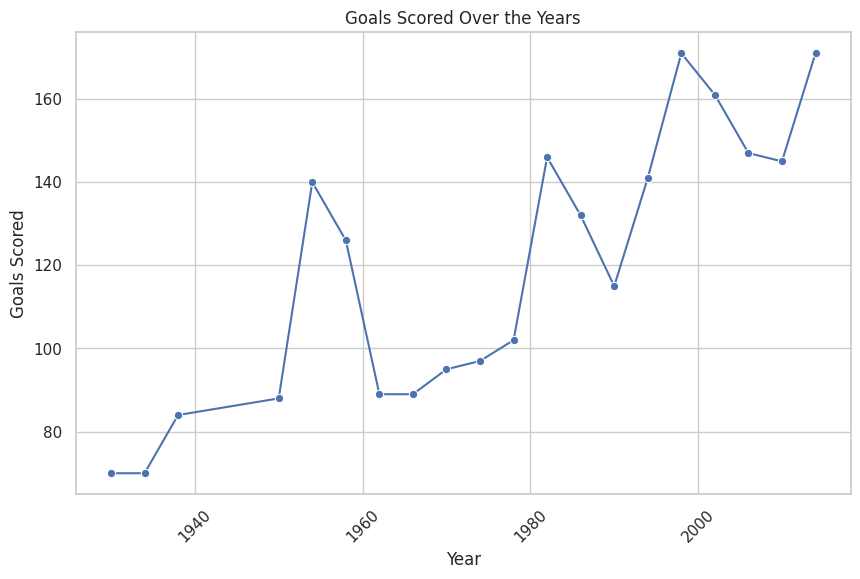

<ipython-input-8-066871662e7a>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total Goals', y='Player Name', data=top_scorers, palette='viridis')


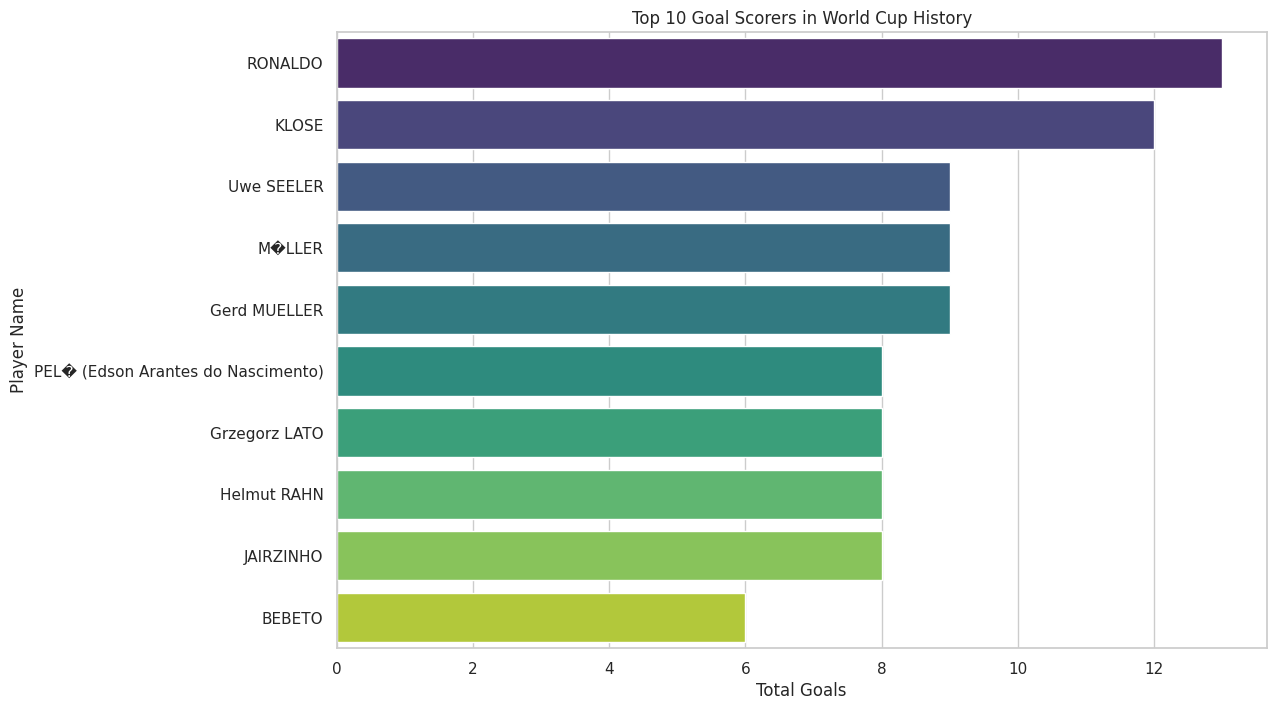

<ipython-input-8-066871662e7a>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Year', y='GoalsScored', data=winners, palette='magma')


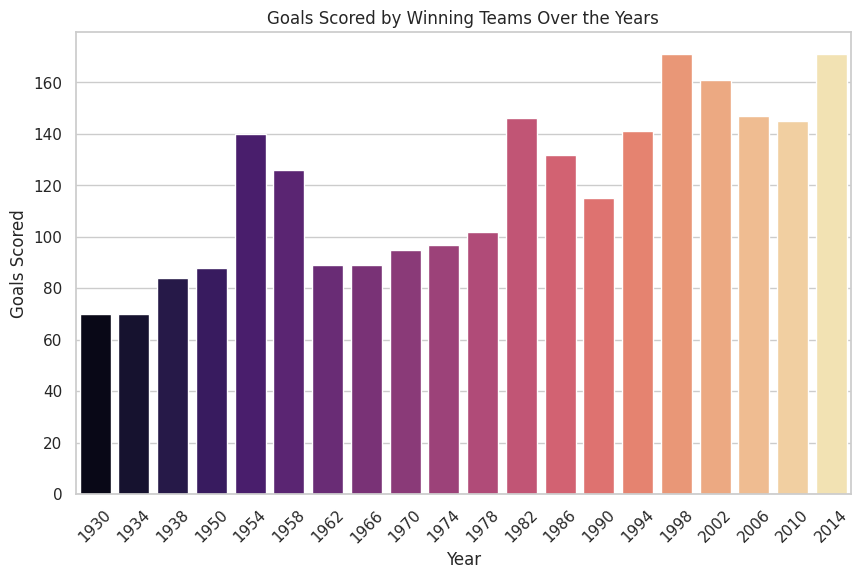

In [ ]:
# Historical performance of winning teams
winners = world_cups[['Year', 'Winner', 'GoalsScored', 'MatchesPlayed', 'Attendance']]

# Exclude non-numeric columns for correlation analysis
numeric_columns = winners.select_dtypes(include=['float64', 'int64']).columns
correlation = winners[numeric_columns].corr()
print(correlation)

# Average goals and points for winning teams
avg_goals_winner = winners['GoalsScored'].mean()
avg_matches_winner = winners['MatchesPlayed'].mean()
print(f"Average Goals by Winning Teams: {avg_goals_winner}")
print(f"Average Matches Played by Winning Teams: {avg_matches_winner}")

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

# Goals scored over the years
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='GoalsScored', data=world_cups, marker='o')
plt.title('Goals Scored Over the Years')
plt.xlabel('Year')
plt.ylabel('Goals Scored')
plt.xticks(rotation=45)
plt.show()

# Top 10 Goal Scorers
plt.figure(figsize=(12, 8))
sns.barplot(x='Total Goals', y='Player Name', data=top_scorers, palette='viridis')
plt.title('Top 10 Goal Scorers in World Cup History')
plt.xlabel('Total Goals')
plt.ylabel('Player Name')
plt.show()

# Performance of winning teams
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='GoalsScored', data=winners, palette='magma')
plt.title('Goals Scored by Winning Teams Over the Years')
plt.xlabel('Year')
plt.ylabel('Goals Scored')
plt.xticks(rotation=45)
plt.show()
